<a href="https://colab.research.google.com/github/abhimithra02/Decision-Tree-diabetes/blob/main/Capstone_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0,8.0)
import seaborn as sns
from scipy import stats
from scipy.stats import norm

pd.set_option('display.max_rows',500)
pd.set_option('display.max_columns',500)
pd.set_option('display.width',1000)

In [ ]:
os.chdir('D:\DATA\Imartics\Python')

In [ ]:
household=pd.read_csv("trains.csv")

In [ ]:
household.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
household.shape

(1460, 81)

In [ ]:
household.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [ ]:
print('The train data has {0} rows and {1} colums'.format(household.shape[0],household.shape[1]))
print('----------------------------')

The train data has 1460 rows and 81 colums
----------------------------


In [ ]:
len(household.columns[household.isnull().any()])

19

In [ ]:
household.columns[household.isnull().any()]

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')

In [ ]:
??pd.Series.sort_values

In [ ]:
miss = (household.isnull().sum()/len(household))*100
miss = miss[miss > 0]
miss.sort_values(inplace=True,ascending = False)
miss

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageYrBlt      5.547945
GarageType       5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
dtype: float64

In [ ]:
type(miss)

pandas.core.series.Series

In [ ]:
miss=pd.DataFrame(miss)
miss.reset_index(inplace=True)
miss.columns=['Name','count']
miss

,Name,count
0,PoolQC,99.520548
1,MiscFeature,96.301370
2,Alley,93.767123
3,Fence,80.753425
4,FireplaceQu,47.260274
5,LotFrontage,17.739726
6,GarageYrBlt,5.547945
7,GarageType,5.547945
8,GarageFinish,5.547945
9,GarageQual,5.547945


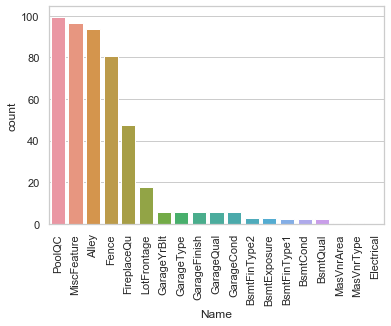

In [ ]:
sns.set(style="whitegrid",color_codes=True)
sns.barplot(x="Name",y="count",data=miss)
plt.xticks(rotation=90)
plt.show()

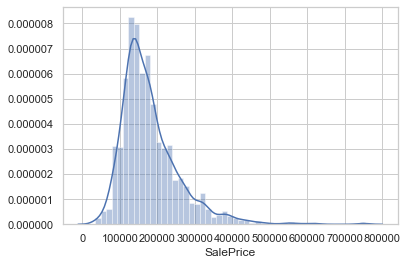

In [ ]:
sns.distplot(household['SalePrice'])
plt.show();

In [ ]:
print("The skewss of saleprice is {}".format(household["SalePrice"].skew()))

The skewss of saleprice is 1.8828757597682129


Skewness is 0.12133506220520406


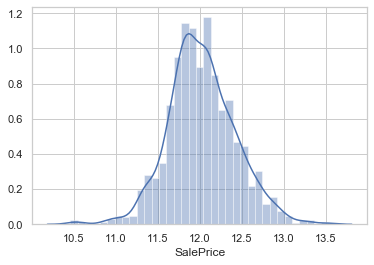

In [ ]:
target=np.log(household['SalePrice'])
print('Skewness is',target.skew())
sns.distplot(target)

In [ ]:
numeric_data=household.select_dtypes(include=[np.number])
cat_data=household.select_dtypes(exclude=[np.number])
print("There are {} numeric and {} categorical colums in train data".format(numeric_data.shape[1],cat_data.shape[1]))

There are 38 numeric and 43 categorical colums in train data


In [ ]:
numeric_data.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


In [ ]:
del numeric_data['Id']

In [ ]:
numeric_data.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


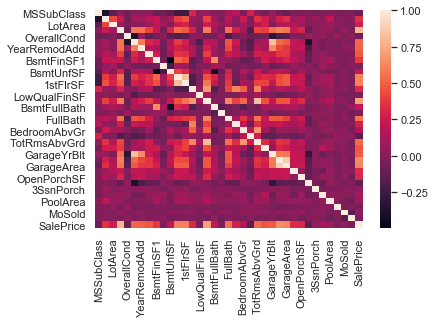

In [ ]:
corr =numeric_data.corr()
sns.heatmap(corr)
plt.show()

In [ ]:
print(corr['SalePrice'].sort_values(ascending=False),'\n')
print('---------------------')

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64 

----

In [ ]:
type(corr)

pandas.core.frame.DataFrame

In [ ]:
type(corr['SalePrice'].sort_values(ascending=False))

pandas.core.series.Series

In [ ]:
dfSeries=corr['SalePrice'].sort_values(ascending=False)

In [ ]:
df = pd.DataFrame(dfSeries) 

In [ ]:
df.to_csv("D:/DATA/corr.csv")

PermissionError: [Errno 13] Permission denied: 'D:/DATA/corr.csv'

In [ ]:
pivot=household.pivot_table(index="OverallQual",values="SalePrice",aggfunc=np.median)
pivot.sort_values("SalePrice")

,SalePrice
OverallQual,
1,50150
2,60000
3,86250
4,108000
5,133000
6,160000
7,200141
8,269750
9,345000


<function matplotlib.pyplot.show(*args, **kw)>

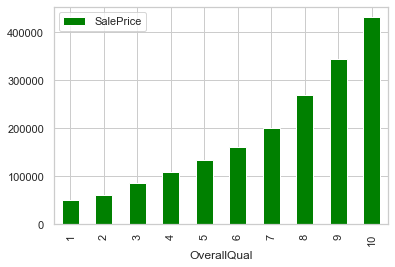

In [ ]:
pivot.plot(kind='bar',color='green')
plt.xticks(rotation=90)
plt.show

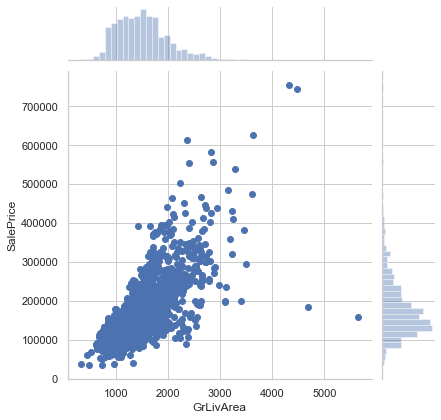

In [ ]:
sns.jointplot(x=household['GrLivArea'],y=household["SalePrice"])

In [ ]:
cat_data.describe()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1452,1460,1460,1460,1423,1423,1422,1423,1422,1460,1460,1460,1459,1460,1460,770,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,8,5,8,6,8,15,16,4,4,5,6,4,4,4,6,6,6,5,2,5,4,7,5,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,1445,1220,726,1141,1434,515,504,864,906,1282,647,649,1311,953,430,1256,1428,741,1365,1334,735,1360,380,870,605,1311,1326,1340,3,157,49,1267,1198


In [ ]:
sp_pivot=household.pivot_table(index="SaleCondition",values="SalePrice",aggfunc=np.median)
sp_pivot

,SalePrice
SaleCondition,
Abnorml,130000
AdjLand,104000
Alloca,148145
Family,140500
Normal,160000
Partial,244600


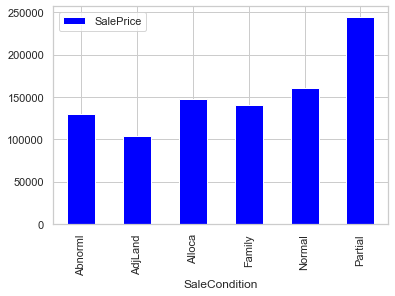

In [ ]:
sp_pivot.plot(kind='bar',color='blue')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3225: RuntimeWarning: invalid value encountered in double_scalars
  ssbn += _square_of_sums(a - offset) / len(a)


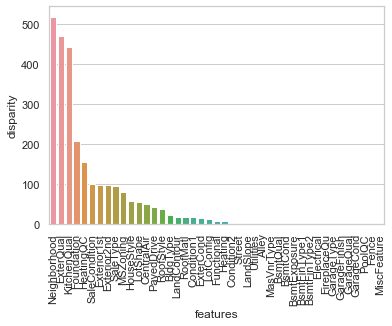

In [ ]:
cat = [f for f in household.columns if household.dtypes[f] == 'object']


def anova(frame):
    anv = pd.DataFrame()
    anv['features'] = cat
    pvals = []
    for c in cat:
           samples = []
           for cls in frame[c].unique():
                  s = frame[frame[c] == cls]['SalePrice'].values
                  samples.append(s)
           pval = stats.f_oneway(*samples)[1]
           pvals.append(pval)
    anv['pval'] = pvals
    return anv.sort_values('pval')

cat_data['SalePrice'] = household.SalePrice.values
k = anova(cat_data) 
k['disparity'] = np.log(1./k['pval'].values) 
sns.barplot(data=k, x = 'features', y='disparity') 
plt.xticks(rotation=90) 
plt.show();

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


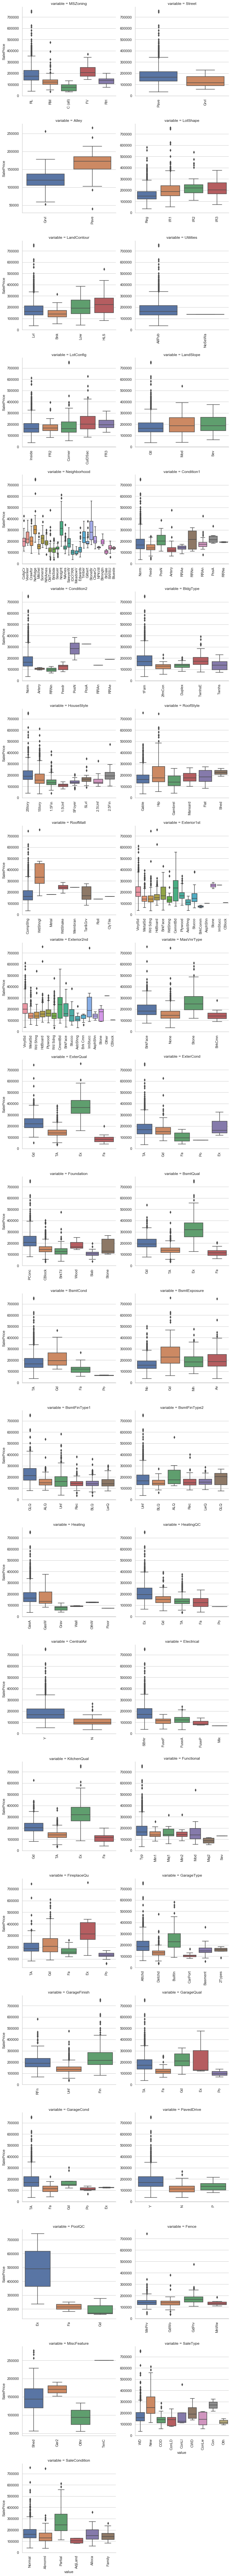

In [ ]:
def boxplot(x,y,**kwargs):
    sns.boxplot(x=x,y=y)
    x=plt.xticks(rotation=90)
cat = [f for f in household.columns if household.dtypes[f] == 'object']

p=pd.melt(household,id_vars="SalePrice",value_vars=cat)
g=sns.FacetGrid (p,col='variable',col_wrap=2,sharex=False,sharey=False,size=5)
g=g.map(boxplot,'value','SalePrice')
g

In [ ]:
household.drop(household[household['GrLivArea']>4000].index,inplace=True)
household.shape

(1456, 81)

In [ ]:
household.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Id,1456,NaN,NaN,NaN,729.967,421.723,1,364.75,730.5,1094.25,1460
MSSubClass,1456,NaN,NaN,NaN,56.8887,42.3584,20,20,50,70,190
MSZoning,1456,5,RL,1147,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LotFrontage,1197,NaN,NaN,NaN,69.6934,23.0545,21,59,69,80,313
LotArea,1456,NaN,NaN,NaN,10448.8,9860.76,1300,7538.75,9468.5,11588,215245
Street,1456,2,Pave,1450,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alley,91,2,Grvl,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LotShape,1456,4,Reg,925,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LandContour,1456,4,Lvl,1309,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Utilities,1456,2,AllPub,1455,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
importantNumericalFeatures = ["GrLivArea","GarageCars","GarageArea","TotalBsmtSF","1stFlrSF","FullBath",
                              "TotRmsAbvGrd","YearBuilt","YearRemodAdd","GarageYrBlt","MasVnrArea","Fireplaces","BsmtFinSF1",
                              "LotFrontage","WoodDeckSF","2ndFlrSF","OpenPorchSF"]

In [ ]:
importantCategoricalFeatures = ["OverallQual","Neighborhood","ExterQual","KitchenQual","Foundation","HeatingQC","SaleCondition","Exterior1st",
                               "Exterior2nd","SaleType","MSZoning","HouseStyle","LotShape","CentralAir","PavedDrive",
                               "RoofStyle","BldgType","LandContour","RoofMatl","Condition1","ExterCond","LotConfig","Functional",
                               "Heating","Condition2","Street","LandSlope","Utilities"]

In [ ]:
dependentVariable="SalePrice"

In [ ]:
household[importantNumericalFeatures].describe().T

,count,mean,std,min,25%,50%,75%,max
GrLivArea,1456.0,1506.502060,496.815378,334.0,1128.00,1458.5,1775.25,3627.0
GarageCars,1456.0,1.764423,0.746215,0.0,1.00,2.0,2.00,4.0
GarageArea,1456.0,471.568681,211.986421,0.0,329.50,478.5,576.00,1390.0
TotalBsmtSF,1456.0,1050.658654,412.155715,0.0,795.00,990.5,1293.75,3206.0
1stFlrSF,1456.0,1157.108516,369.307331,334.0,882.00,1086.0,1389.25,3228.0
FullBath,1456.0,1.561813,0.547683,0.0,1.00,2.0,2.00,3.0
TotRmsAbvGrd,1456.0,6.506181,1.611800,2.0,5.00,6.0,7.00,14.0
YearBuilt,1456.0,1971.185440,30.201590,1872.0,1954.00,1972.0,2000.00,2010.0
YearRemodAdd,1456.0,1984.819368,20.652143,1950.0,1966.75,1993.5,2004.00,2010.0
GarageYrBlt,1375.0,1978.440000,24.692738,1900.0,1961.00,1980.0,2002.00,2010.0


In [ ]:
household.shape

(1456, 81)

In [ ]:
householdModleData=household[importantNumericalFeatures+importantCategoricalFeatures
                             +[dependentVariable]]

In [ ]:
householdModleData.shape

(1456, 46)

In [ ]:
X_dumm=pd.get_dummies(householdModleData,columns=importantCategoricalFeatures,drop_first=True)

In [ ]:
X=X_dumm.drop("SalePrice",axis=1)
y=X_dumm[dependentVariable]

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20)

X_train.shape,X_test.shape

((1164, 180), (292, 180))

In [ ]:
X_test.isnull().sum()

GrLivArea                 0
GarageCars                0
GarageArea                0
TotalBsmtSF               0
1stFlrSF                  0
FullBath                  0
TotRmsAbvGrd              0
YearBuilt                 0
YearRemodAdd              0
GarageYrBlt              16
MasVnrArea                0
Fireplaces                0
BsmtFinSF1                0
LotFrontage              55
WoodDeckSF                0
2ndFlrSF                  0
OpenPorchSF               0
OverallQual_2             0
OverallQual_3             0
OverallQual_4             0
OverallQual_5             0
OverallQual_6             0
OverallQual_7             0
OverallQual_8             0
OverallQual_9             0
OverallQual_10            0
Neighborhood_Blueste      0
Neighborhood_BrDale       0
Neighborhood_BrkSide      0
Neighborhood_ClearCr      0
Neighborhood_CollgCr      0
Neighborhood_Crawfor      0
Neighborhood_Edwards      0
Neighborhood_Gilbert      0
Neighborhood_IDOTRR       0
Neighborhood_MeadowV

In [ ]:
X_train.loc[X_train.GarageYrBlt.isnull(),"GarageYrBlt"]=X_train["GarageYrBlt"].median()


X_test.loc[X_test.GarageYrBlt.isnull(),"GarageYrBlt"]=X_train["GarageYrBlt"].median()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [ ]:
X_train.loc[X_train.LotFrontage.isnull(),"LotFrontage"] =X_train["LotFrontage"].median()


X_test.loc[X_test.LotFrontage.isnull(),"LotFrontage"] =X_train["LotFrontage"].median()

In [ ]:
X_train.loc[X_train.MasVnrArea.isnull(),"MasVnrArea"] =X_train["MasVnrArea"].median()


X_test.loc[X_test.MasVnrArea.isnull(),"MasVnrArea"] =X_train["MasVnrArea"].median()

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler =StandardScaler()

print("Standardization Started")

X_train_standardized=scaler.fit_transform(X_train[importantNumericalFeatures])
X_test_standardized=scaler.transform(X_test[importantNumericalFeatures])

X_train_standardized = pd.DataFrame(X_train_standardized)
X_test_standardized=pd.DataFrame(X_test_standardized)

print("Standardized done")

Standardization Started
Standardized done


In [ ]:
X_train_standardized.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,-1.046200,-1.020464,-1.374171,-0.225745,-0.474684,-1.038555,-0.919476,-1.476186,-1.702987,-2.154568,-0.574351,0.592253,-1.031884,-0.489875,-0.749650,-0.781872,1.303442
1,0.249114,1.657822,1.924296,5.171416,1.256277,0.795858,0.314265,1.056792,0.926221,1.020950,1.072159,0.592253,1.601170,0.710980,-0.749650,-0.781872,-0.689379
2,-1.001881,-1.020464,-1.091445,-0.110400,-0.415459,-1.038555,-0.302606,-0.587999,1.023599,-1.041074,-0.574351,-0.946547,0.474391,-0.201669,-0.749650,-0.781872,-0.409139
3,-0.443869,0.318679,0.265638,-0.946648,0.330226,-1.038555,0.314265,0.201501,-0.388383,-0.051303,0.248904,0.592253,-1.031884,0.038502,0.359854,-0.781872,-0.689379
4,0.456606,0.318679,0.020609,-0.752004,-0.498912,0.795858,0.314265,0.464668,0.001129,0.278621,1.294660,0.592253,-1.031884,0.326707,0.794008,0.969978,0.026791


In [ ]:
X_train_standardized.columns=importantNumericalFeatures
X_test_standardized.columns=importantNumericalFeatures

In [ ]:
X_train_standardized.head()

,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,GarageYrBlt,MasVnrArea,Fireplaces,BsmtFinSF1,LotFrontage,WoodDeckSF,2ndFlrSF,OpenPorchSF
0,-1.046200,-1.020464,-1.374171,-0.225745,-0.474684,-1.038555,-0.919476,-1.476186,-1.702987,-2.154568,-0.574351,0.592253,-1.031884,-0.489875,-0.749650,-0.781872,1.303442
1,0.249114,1.657822,1.924296,5.171416,1.256277,0.795858,0.314265,1.056792,0.926221,1.020950,1.072159,0.592253,1.601170,0.710980,-0.749650,-0.781872,-0.689379
2,-1.001881,-1.020464,-1.091445,-0.110400,-0.415459,-1.038555,-0.302606,-0.587999,1.023599,-1.041074,-0.574351,-0.946547,0.474391,-0.201669,-0.749650,-0.781872,-0.409139
3,-0.443869,0.318679,0.265638,-0.946648,0.330226,-1.038555,0.314265,0.201501,-0.388383,-0.051303,0.248904,0.592253,-1.031884,0.038502,0.359854,-0.781872,-0.689379
4,0.456606,0.318679,0.020609,-0.752004,-0.498912,0.795858,0.314265,0.464668,0.001129,0.278621,1.294660,0.592253,-1.031884,0.326707,0.794008,0.969978,0.026791


In [ ]:
X_train_cat=X_train.drop(importantNumericalFeatures,axis=1)
X_test_cat=X_test.drop(importantNumericalFeatures,axis=1)

X_train_cat.reset_index(inplace=True,drop=True)
X_test_cat.reset_index(inplace=True,drop=True)

In [ ]:
y_train.reset_index(inplace=True,drop=True)
y_test.reset_index(inplace=True,drop=True)

In [ ]:
X_train_transformed=pd.concat([X_train_standardized,X_train_cat],axis=1)
X_test_transformed=pd.concat([X_test_standardized,X_test_cat],axis=1)

print(X_train_standardized.shape)
print(X_test_standardized.shape)

(1164, 17)
(292, 17)


In [ ]:
import statsmodels.api as sm
from IPython.display import HTML,display

In [ ]:
X_train_transformed.isnull().sum()

GrLivArea                0
GarageCars               0
GarageArea               0
TotalBsmtSF              0
1stFlrSF                 0
FullBath                 0
TotRmsAbvGrd             0
YearBuilt                0
YearRemodAdd             0
GarageYrBlt              0
MasVnrArea               0
Fireplaces               0
BsmtFinSF1               0
LotFrontage              0
WoodDeckSF               0
2ndFlrSF                 0
OpenPorchSF              0
OverallQual_2            0
OverallQual_3            0
OverallQual_4            0
OverallQual_5            0
OverallQual_6            0
OverallQual_7            0
OverallQual_8            0
OverallQual_9            0
OverallQual_10           0
Neighborhood_Blueste     0
Neighborhood_BrDale      0
Neighborhood_BrkSide     0
Neighborhood_ClearCr     0
Neighborhood_CollgCr     0
Neighborhood_Crawfor     0
Neighborhood_Edwards     0
Neighborhood_Gilbert     0
Neighborhood_IDOTRR      0
Neighborhood_MeadowV     0
Neighborhood_Mitchel     0
N

In [ ]:
housing_model_v1= sm.OLS(y_train,X_train_transformed).fit()

housing_model_summary= housing_model_v1.summary()
housing_model_summary

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:1294: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              SalePrice   R-squared (uncentered):                   0.989
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                              523.9
Date:                Sun, 01 Mar 2020   Prob (F-statistic):                        0.00
Time:                        12:56:29   Log-Likelihood:                         -13190.
No. Observations:                1164   AIC:                                  2.673e+04
Df Residuals:                     989   BIC:                                  2.761e+04
Df Model:                         175                                                  
Covariance Type:            nonrobust                                                  
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
GrLivArea              1.636e+04   9402.554      1.740      0.082   -2091.953    3.48e+04
GarageCars             3778.9044   1752.126      2.157      0.031     340.593    7217.216
GarageArea             1092.4664   1703.715      0.641      0.522   -2250.846    4435.778
TotalBsmtSF            5903.5714   1693.583      3.486      0.001    2580.142    9227.001
1stFlrSF               8318.0560   7125.926      1.167      0.243   -5665.615    2.23e+04
FullBath                233.0462   1135.784      0.205      0.837   -1995.778    2461.870
TotRmsAbvGrd           -650.9585   1478.616     -0.440      0.660   -3552.544    2250.627
YearBuilt              4435.7116   2255.334      1.967      0.049       9.923    8861.500
YearRemodAdd           4596.3905   1128.085      4.075      0.000    2382.675    6810.106
GarageYrBlt            1531.6567   1347.473      1.137      0.256   -1112.578    4175.891
MasVnrArea             2875.2103    879.537      3.269      0.001    1149.237    4601.184
Fireplaces             2055.9224    901.939      2.279      0.023     285.989    3825.856
BsmtFinSF1             1.037e+04    862.736     12.015      0.000    8672.920    1.21e+04
LotFrontage            2468.2738    945.000      2.612      0.009     613.839    4322.709
WoodDeckSF             1578.3924    770.533      2.048      0.041      66.324    3090.461
2ndFlrSF               1.101e+04   8084.072      1.362      0.174   -4854.915    2.69e+04
OpenPorchSF            2109.9995    791.705      2.665      0.008     556.385    3663.614
OverallQual_2          2.947e+04    2.5e+04      1.180      0.238   -1.95e+04    7.85e+04
OverallQual_3          1.486e+04   1.95e+04      0.763      0.446   -2.34e+04    5.31e+04
OverallQual_4          1.932e+04   1.93e+04      0.999      0.318   -1.86e+04    5.73e+04
OverallQual_5          2.203e+04   1.93e+04      1.140      0.255   -1.59e+04       6e+04
OverallQual_6          2.535e+04   1.95e+04      1.300      0.194   -1.29e+04    6.36e+04
OverallQual_7          3.285e+04   1.95e+04      1.685      0.092   -5415.037    7.11e+04
OverallQual_8          5.125e+04   1.97e+04      2.597      0.010    1.25e+04       9e+04
OverallQual_9           9.53e+04   2.03e+04      4.691      0.000    5.54e+04    1.35e+05
OverallQual_10         1.312e+05   2.16e+04      6.080      0.000    8.88e+04    1.73e+05
Neighborhood_Blueste   -778.5478   2.35e+04     -0.033      0.974   -4.68e+04    4.53e+04
Neighborhood_BrDale    2487.5108   1.16e+04      0.215      0.830   -2.02e+04    2.52e+04
Neighborhood_BrkSide   5914.4975   9312.749      0.635      0.526   -1.24e+04    2.42e+04
Neighborhood_ClearCr   4504.6948   9222.195      0.488      0.625   -1.36e+04    2.26e+04
Neighborhood_C

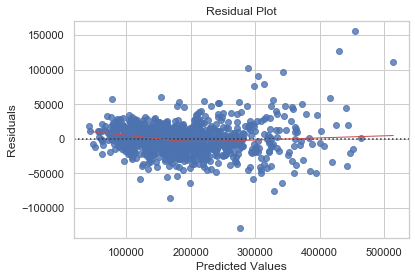

In [ ]:
sns.residplot(housing_model_v1.fittedvalues,y_train,lowess=True,
              line_kws = {'color':'r','lw':1})
#plt.figure(figsize=(15,8))
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show();

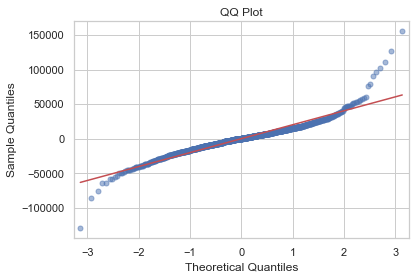

In [ ]:
from statsmodels.graphics.gofplots import ProbPlot
QQ = ProbPlot(housing_model_v1.resid)
fig = QQ.qqplot(alpha = 0.5,markersize = 5,line = 's')
plt.title('QQ Plot')
plt.show();

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:695: RuntimeWarning: invalid value encountered in sqrt
  return self.resid / sigma / np.sqrt(1 - hii)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:695: RuntimeWarning: divide by zero encountered in true_divide
  return self.resid / sigma / np.sqrt(1 - hii)


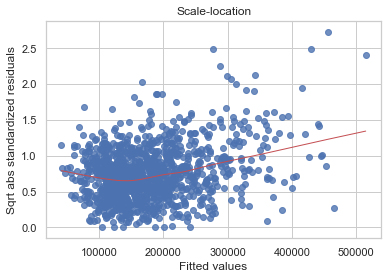

In [ ]:
# normalised residuals
model_norm_resid = housing_model_v1.get_influence().resid_studentized_internal

# absolute squared normalised residuals
model_norm_resid_abs_sqrt = np.sqrt(np.abs(model_norm_resid))

# plot scale-location
sns.regplot(housing_model_v1.fittedvalues, model_norm_resid_abs_sqrt, lowess=True, line_kws={'color':'r', 'lw':1})
plt.xlabel('Fitted values')
plt.ylabel('Sqrt abs standardized residuals')
plt.title('Scale-location')
plt.show();

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:695: RuntimeWarning: invalid value encountered in sqrt
  return self.resid / sigma / np.sqrt(1 - hii)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:695: RuntimeWarning: divide by zero encountered in true_divide
  return self.resid / sigma / np.sqrt(1 - hii)


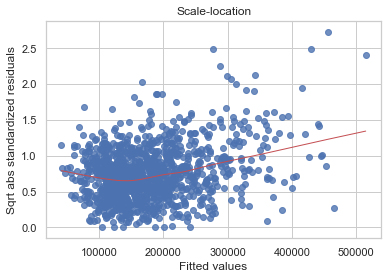

In [ ]:
# normalised residuals
model_norm_resid = housing_model_v1.get_influence().resid_studentized_internal

# absolute squared normalised residuals
model_norm_resid_abs_sqrt = np.sqrt(np.abs(model_norm_resid))

# plot scale-location
sns.regplot(housing_model_v1.fittedvalues, model_norm_resid_abs_sqrt, lowess=True, line_kws={'color':'r', 'lw':1})
plt.xlabel('Fitted values')
plt.ylabel('Sqrt abs standardized residuals')
plt.title('Scale-location')
plt.show();

In [ ]:
y_test_pred=housing_model_v1.predict(X_test_transformed)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

print ("R2 score : %.2f" %r2_score(y_test,y_test_pred))
print("Root mean squared error: %.2f" % np.sqrt(mean_squared_error(y_test,y_test_pred)))

R2 score : 0.89
Root mean squared error: 26071.36
